# Data uploading 

In [23]:
!pip install -Uqq ipdb
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import ipdb
import statistics
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import files

In [25]:
# download video-data

def upload_files_recursively(path, data, filter):
    for root, dirs, files in os.walk(path):
        for file in files:
            if filter(file):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    jsonData = json.load(f)
                    jsonData['name'] = file
                    video_id = ''
                    try:
                      video_id = jsonData['video_id']
                    except:
                      print('    ERROR OCCURED: ' + file)
                      continue
                    # ipdb.set_trace(context=1)
                    print(video_id + ' : ' + file)
                    data.append(jsonData)

In [26]:
FEDfilter = lambda file: file.endswith('.json')
expertData = []
resData = pd.DataFrame(columns=['id', 'time'])
upload_files_recursively('/content/experts/', expertData, FEDfilter)

expertData = sorted(expertData, key=lambda a: a['name'])



# print('-' * 32)
# ids = []

# for v in expertData:
#   ids.append({ 'id':v['video_id'], 'date':v['name'][:6] })
#   print(v['name'])

# resData = pd.DataFrame(ids, columns=['id', 'date'])
# resData = resData.set_index('id')

# resData

61899012-04de-42cc-8af0-80bd3ce99cb4 : 180914-watchv=EO0ngv_oLIg&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=33_61899012-04de-42cc-8af0-80bd3ce99cb4.json
f946b729-a4b6-4358-971b-55835e585cda : 161216-watchv=4MCcx_ZsqJU&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=40_f946b729-a4b6-4358-971b-55835e585cda.json
06897558-d0b4-4cbf-b57a-5faf070fed30 : 181214-watchv=cw_s5DgwMxU&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=32_06897558-d0b4-4cbf-b57a-5faf070fed30.json
d0676316-2956-42e7-b6a8-90277a62bbdd : 190322-watchv=q-Zw5jBfB8M&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=31_d0676316-2956-42e7-b6a8-90277a62bbdd.json
d1abc5e4-a2bb-4baf-b950-17865f4b568f : 170616-watchv=cwChTWU8hnA&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=38_d1abc5e4-a2bb-4baf-b950-17865f4b568f.json
840207c0-702c-482e-aef2-903a5f0970fb : 170324-watchv=BivvfOofwiE&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=39_840207c0-702c-482e-aef2-903a5f0970fb.json


In [27]:
expertData

[{'video_id': 'f946b729-a4b6-4358-971b-55835e585cda',
  'status': 'READY',
  'emotions': [{'video': [{'video_path': 'upload_file/f946b729-a4b6-4358-971b-55835e585cda.mp4',
      'time_sec': 20,
      'video_anger': 0.3574470579624176,
      'video_neutral': 0.33182603120803833,
      'video_happiness': 0.31072694063186646},
     {'video_path': 'upload_file/f946b729-a4b6-4358-971b-55835e585cda.mp4',
      'time_sec': 30,
      'video_anger': 0.36808472871780396,
      'video_neutral': 0.32416146993637085,
      'video_happiness': 0.30775386095046997},
     {'video_path': 'upload_file/f946b729-a4b6-4358-971b-55835e585cda.mp4',
      'time_sec': 40,
      'video_anger': 0.35457587242126465,
      'video_neutral': 0.3350291848182678,
      'video_happiness': 0.3103950321674347},
     {'video_path': 'upload_file/f946b729-a4b6-4358-971b-55835e585cda.mp4',
      'time_sec': 50,
      'video_anger': 0.3607449531555176,
      'video_neutral': 0.32917362451553345,
      'video_happiness': 0.3100

# Analysis for one video:

In [28]:
def analysis_for_one_video():

  for video in expertData:
    # confidence
    values_confidence = []
    conf = video['confidence']
    id = video['video_id']

    if conf is not None:
      for piece in conf:
        try:
          values_confidence.append(float(piece['confidence']))
        except:
          print('Error value: ' + piece['confidence'] + ' | id: ' + id)
    else:
      print('there is none')

    if len(values_confidence) > 0:
      resData.loc[id, 'conf_avg'] = sum(values_confidence) / len(values_confidence)
      resData.loc[id, 'conf_max'] = max(values_confidence)
      resData.loc[id, 'conf_min'] = min(values_confidence)
      resData.loc[id, 'conf_median'] = statistics.median(values_confidence)
    else:
      print('empty video: ' + id)

    # congruence
    values_congruence = []
    cngr = video['congruence']
    id = video['video_id']

    if cngr is not None:
      for piece in cngr:
        try:
          values_congruence.append(float(piece['congruence']))
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)
    else:
      print('there is none')

    if len(values_congruence) > 0:
      resData.loc[id, 'cngr_avg'] = sum(values_congruence) / len(values_congruence)
      resData.loc[id, 'cngr_max'] = max(values_congruence)
      resData.loc[id, 'cngr_min'] = min(values_congruence)
      resData.loc[id, 'cngr_median'] = statistics.median(values_congruence)
    else:
      print('empty video: ' + id)

    # aggression
    try:
      emotions = video['emotions'][0]
      agr_div = video['aggression_divided']
      agr_agg = video['aggression_aggregated']
    except Exception as e:
      print(f'aggression. videoId = {video["video_id"]} Exception: {e}')

    id = video['video_id']

    emotions_video_anger_vals = []
    emotions_video_neutral_vals = []
    emotions_video_happiness_vals = []

    emotions_audio_anger_vals = []
    emotions_audio_neutral_vals = []
    emotions_audio_happiness_vals = []

    emotions_text_anger_vals = []
    emotions_text_neutral_vals = []
    emotions_text_happiness_vals = []

    if emotions is not None:
      for piece in emotions['video']:
        try:
          emotions_video_anger_vals.append(piece['video_anger'])
          emotions_video_neutral_vals.append(piece['video_neutral'])
          emotions_video_happiness_vals.append(piece['video_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)


      for piece in emotions['audio']:
        try:
          emotions_audio_anger_vals.append(piece['audio_anger'])
          emotions_audio_neutral_vals.append(piece['audio_neutral'])
          emotions_audio_happiness_vals.append(piece['audio_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)


      for piece in emotions['text']:
        try:
          emotions_text_anger_vals.append(piece['text_anger'])
          emotions_text_neutral_vals.append(piece['text_neutral'])
          emotions_text_happiness_vals.append(piece['text_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)

    else:
      print('there is none')

    resData.loc[id, 'vid_anger_avg'] = sum(emotions_video_anger_vals) / len(emotions_video_anger_vals)
    resData.loc[id, 'vid_neutral_avg'] = sum(emotions_video_neutral_vals) / len(emotions_video_neutral_vals)
    resData.loc[id, 'vid_happiness_avg'] = sum(emotions_video_happiness_vals) / len(emotions_video_happiness_vals)

    resData.loc[id, 'aud_anger_avg'] = sum(emotions_audio_anger_vals) / len(emotions_audio_anger_vals)
    resData.loc[id, 'aud_neutral_avg'] = sum(emotions_audio_neutral_vals) / len(emotions_audio_neutral_vals)
    resData.loc[id, 'aud_happiness_avg'] = sum(emotions_audio_happiness_vals) / len(emotions_audio_happiness_vals)
    
    resData.loc[id, 'txt_anger_avg'] = sum(emotions_text_anger_vals) / len(emotions_text_anger_vals)
    resData.loc[id, 'txt_neutral_avg'] = sum(emotions_text_neutral_vals) / len(emotions_text_neutral_vals)
    resData.loc[id, 'txt_happiness_avg'] = sum(emotions_text_happiness_vals) / len(emotions_text_happiness_vals)

    

In [29]:
analysis_for_one_video()
resData

Error value: No face | id: 840207c0-702c-482e-aef2-903a5f0970fb
Error value: No face | id: 840207c0-702c-482e-aef2-903a5f0970fb
Error value: No face | id: d1abc5e4-a2bb-4baf-b950-17865f4b568f


id time  conf_avg  conf_max  conf_min  \
f946b729-a4b6-4358-971b-55835e585cda  NaN  NaN  0.644807  0.657192  0.634600   
840207c0-702c-482e-aef2-903a5f0970fb  NaN  NaN  0.644762  0.665711  0.634858   
d1abc5e4-a2bb-4baf-b950-17865f4b568f  NaN  NaN  0.645155  0.656958  0.636787   
61899012-04de-42cc-8af0-80bd3ce99cb4  NaN  NaN  0.647127  0.659972  0.635747   
06897558-d0b4-4cbf-b57a-5faf070fed30  NaN  NaN  0.646866  0.657484  0.635769   
d0676316-2956-42e7-b6a8-90277a62bbdd  NaN  NaN  0.648230  0.658011  0.636574   

                                      conf_median  cngr_avg  cngr_max  \
f946b729-a4b6-4358-971b-55835e585cda     0.644470  0.108086  0.223152   
840207c0-702c-482e-aef2-903a5f0970fb     0.644347  0.110753  0.164818   
d1abc5e4-a2bb-4baf-b950-17865f4b568f     0.644864  0.094023  0.147514   
61899012-04de-42cc-8af0-80bd3ce99cb4     0.647110  0.096347  0.131189   
06897558-d0b4-4cbf-b57a-5faf070fed30     0.646554  0.096825  0.146485   
d0676316-2956-42e7-b6a8-90277a62bbdd     0.648405  0.099957  0.139987   

                                      cngr_min  cngr_median  vid_anger_avg  \
f946b729-a4b6-4358-971b-55835e585cda  0.056456     0.105899       0.354154   
840207c0-702c-482e-aef2-903a5f0970fb  0.051807     0.110291       0.346592   
d1abc5e4-a2bb-4baf-b950-17865f4b568f  0.065357     0.092993       0.314759   
61899012-04de-42cc-8af0-80bd3ce99cb4  0.051731     0.097658       0.332160   
06897558-d0b4-4cbf-b57a-5faf070fed30  0.061056     0.095331       0.345281   
d0676316-2956-42e7-b6a8-90277a62bbdd  0.049157     0.100201       0.349310   

                                      vid_neutral_avg  vid_happiness_avg  \
f946b729-a4b6-4358-971b-55835e585cda         0.323644           0.311786   
840207c0-702c-482e-aef2-903a5f0970fb         0.336516           0.313537   
d1abc5e4-a2bb-4baf-b950-17865f4b568f         0.349935           0.309400   
61899012-04de-42cc-8af0-80bd3ce99cb4         0.340491           0.322494   
06897558-d0b4-4cbf-b57a-5faf070fed30         0.328823           0.320633   
d0676316-2956-42e7-b6a8-90277a62bbdd         0.323383           0.319275   

                                      aud_anger_avg  aud_neutral_avg  \
f946b729-a4b6-4358-971b-55835e585cda       0.396717         0.300084   
840207c0-702c-482e-aef2-903a5f0970fb       0.373712         0.310193   
d1abc5e4-a2bb-4baf-b950-17865f4b568f       0.370261         0.313013   
61899012-04de-42cc-8af0-80bd3ce99cb4       0.374704         0.311777   
06897558-d0b4-4cbf-b57a-5faf070fed30       0.365861         0.315941   
d0676316-2956-42e7-b6a8-90277a62bbdd       0.374526         0.310560   

                                      aud_happiness_avg  txt_anger_avg  \
f946b729-a4b6-4358-971b-55835e585cda           0.303199       0.283257   
840207c0-702c-482e-aef2-903a5f0970fb           0.316095       0.273941   
d1abc5e4-a2bb-4baf-b950-17865f4b568f           0.316726       0.282589   
61899012-04de-42cc-8af0-80bd3ce99cb4           0.313519       0.284045   
06897558-d0b4-4cbf-b57a-5faf070fed30           0.318198       0.283617   
d0676316-2956-42e7-b6a8-90277a62bbdd           0.314914       0.284187   

                                      txt_neutral_avg  txt_happiness_avg  
f946b729-a4b6-4358-971b-55835e585cda         0.447267           0.269476  
840207c0-702c-482e-aef2-903a5f0970fb         0.463141           0.262918  
d1abc5e4-a2bb-4baf-b950-17865f4b568f         0.448177           0.269235  
61899012-04de-42cc-8af0-80bd3ce99cb4         0.445660           0.270295  
06897558-d0b4-4cbf-b57a-5faf070fed30         0.446235           0.270149  
d0676316-2956-42e7-b6a8-90277a62bbdd         0.445580           0.270233

------------------------------------------------------------------

# Data preparation

In [30]:
def enrich_with_confidence(res_df, expt_data):
  print('confidence. id = ' + expt_data['video_id'])
  conf = pd.DataFrame(expt_data['confidence'])
  res_df['time_sec_conf'] = conf['time_sec']
  res_df['conf'] = conf['confidence']


def enrich_with_congruence(res_df, expt_data):
  print('congruence. id = ' + expt_data['video_id'])
  congr = pd.DataFrame(expt_data['congruence'])
  res_df['time_sec_congr'] = congr['time_sec']
  res_df['congr'] = congr['congruence']


def enrich_with_aggression(res_df, expt_data):
  print('aggression. id = ' + expt_data['video_id'])
  aggr_video = pd.DataFrame(expt_data['aggression_divided'][0]['audio'])
  res_df['time_sec_aggr'] = aggr_video['time_sec']
  res_df['aggr_a_volume'] = aggr_video['volume']
  res_df['aggr_a_temp'] = aggr_video['temp'] / 1000

In [31]:
def enrich_with_market_data(res_df):

  ticker = 'RTSI'
  time_mkt_start = 150000
  time_mkt_end = 160000

  time_marker_for_previous_value = None

  for index, row in res_df.iterrows():
    date = row['date']
    mrk = pd.read_csv(f'/content/market/{ticker}_{date}_{date}.csv', sep=',')

    mkt_with_time_sec = mrk.loc[(mrk['<TIME>'] > time_mkt_start) & (mrk['<TIME>'] < time_mkt_end)]
    init_mkt_value = mkt_with_time_sec.iloc[0]['<LAST>']


    minuteFromVideo = int(row['time_sec'] / 60)
    secondFromVideo = int(row['time_sec'] % 60)

    minuteFromVideoStr = minuteFromVideo if minuteFromVideo > 9 else "0" + str(minuteFromVideo)
    secondFromVideoStr = secondFromVideo if secondFromVideo > 9 else "0" + str(secondFromVideo)

    timeFromMkt = int(f'15{minuteFromVideoStr}{secondFromVideoStr}')

    mkt_value_at_time_df = mkt_with_time_sec.loc[(mkt_with_time_sec['<TIME>'] == timeFromMkt)]['<LAST>']

    try:
      mktValueAtTime = float(mkt_value_at_time_df)
    except Exception as e:
      print(f'id={video_data["video_id"]} time_sec={row["time_sec"]} minuteFromVideo={minuteFromVideo} timeFromMkt={timeFromMkt} mktValueAtTimeDf={mkt_value_at_time_df}')
      print(e)

    rel_mkt_value = mktValueAtTime / init_mkt_value
    
    if time_marker_for_previous_value is None:
      time_marker_for_previous_value = rel_mkt_value

    res_df.loc[index, f'{ticker}-value'] = rel_mkt_value
    res_df.loc[index, f'{ticker}-init-value'] = init_mkt_value
    res_df.loc[index, f'{ticker}-change-value'] = abs(time_marker_for_previous_value - rel_mkt_value)

    time_marker_for_previous_value = rel_mkt_value



In [32]:
time_expt_start = 0
time_expt_end = 3600

result_data = pd.DataFrame()

for video_data in expertData:

  print('video id: ' + video_data['video_id'] + ' date: ' + video_data['name'][:6])
  expt_videos_emotions = pd.DataFrame(video_data['emotions'][0]['video'])
  expt_videos_emotions['date'] = video_data['name'][:6]
  expt_videos_emotions = expt_videos_emotions.loc[(expt_videos_emotions['time_sec'] > time_expt_start) & (expt_videos_emotions['time_sec'] < time_expt_end)]

  filTfdata = expt_videos_emotions[expt_videos_emotions['video_anger'] != 0]

  divided_by_minute_expt_data = filTfdata
  # divided_by_minute_expt_data = filTfdata[filTfdata['time_sec'] % 60 == 0]
  divided_by_minute_expt_data = divided_by_minute_expt_data.interpolate(method='linear', limit_direction='both')

  enrich_with_confidence(divided_by_minute_expt_data, video_data)
  enrich_with_congruence(divided_by_minute_expt_data, video_data)
  enrich_with_aggression(divided_by_minute_expt_data, video_data)

  enrich_with_market_data(divided_by_minute_expt_data)

  result_data = pd.concat([result_data, divided_by_minute_expt_data])


result_data

video id: f946b729-a4b6-4358-971b-55835e585cda date: 161216
confidence. id = f946b729-a4b6-4358-971b-55835e585cda
congruence. id = f946b729-a4b6-4358-971b-55835e585cda
aggression. id = f946b729-a4b6-4358-971b-55835e585cda
id=f946b729-a4b6-4358-971b-55835e585cda time_sec=190 minuteFromVideo=3 timeFromMkt=150310 mktValueAtTimeDf=Series([], Name: <LAST>, dtype: float64)
cannot convert the series to <class 'float'>
id=f946b729-a4b6-4358-971b-55835e585cda time_sec=2890 minuteFromVideo=48 timeFromMkt=154810 mktValueAtTimeDf=Series([], Name: <LAST>, dtype: float64)
cannot convert the series to <class 'float'>
video id: 840207c0-702c-482e-aef2-903a5f0970fb date: 170324
confidence. id = 840207c0-702c-482e-aef2-903a5f0970fb
congruence. id = 840207c0-702c-482e-aef2-903a5f0970fb
aggression. id = 840207c0-702c-482e-aef2-903a5f0970fb
id=840207c0-702c-482e-aef2-903a5f0970fb time_sec=230 minuteFromVideo=3 timeFromMkt=150350 mktValueAtTimeDf=Series([], Name: <LAST>, dtype: float64)
cannot convert the s

video_path  time_sec  video_anger  \
0    upload_file/f946b729-a4b6-4358-971b-55835e585c...        20     0.357447   
1    upload_file/f946b729-a4b6-4358-971b-55835e585c...        30     0.368085   
2    upload_file/f946b729-a4b6-4358-971b-55835e585c...        40     0.354576   
3    upload_file/f946b729-a4b6-4358-971b-55835e585c...        50     0.360745   
4    upload_file/f946b729-a4b6-4358-971b-55835e585c...        60     0.360367   
..                                                 ...       ...          ...   
244  upload_file/d0676316-2956-42e7-b6a8-90277a62bb...      2810     0.357142   
245  upload_file/d0676316-2956-42e7-b6a8-90277a62bb...      2820     0.367091   
246  upload_file/d0676316-2956-42e7-b6a8-90277a62bb...      2830     0.363125   
247  upload_file/d0676316-2956-42e7-b6a8-90277a62bb...      2840     0.362444   
248  upload_file/d0676316-2956-42e7-b6a8-90277a62bb...      2850     0.384442   

     video_neutral  video_happiness    date  time_sec_conf      conf  \
0         0.331826         0.310727  161216           20.0   0.64092   
1         0.324161         0.307754  161216           30.0  0.636663   
2         0.335029         0.310395  161216           40.0   0.63884   
3         0.329174         0.310081  161216           50.0  0.641942   
4         0.331267         0.308366  161216           60.0  0.642279   
..             ...              ...     ...            ...       ...   
244       0.323930         0.318928  190322            NaN       NaN   
245       0.317662         0.315247  190322            NaN       NaN   
246       0.319481         0.317394  190322            NaN       NaN   
247       0.320941         0.316615  190322            NaN       NaN   
248       0.307153         0.308405  190322            NaN       NaN   

     time_sec_congr     congr  time_sec_aggr  aggr_a_volume  aggr_a_temp  \
0              20.0  0.078921           20.0        0.08521     0.133929   
1              30.0  0.092878           30.0        0.08837     0.125000   
2              40.0  0.098979           40.0        0.07978     0.144231   
3              50.0  0.127703           50.0        0.07115     0.133929   
4              60.0  0.103482           60.0        0.10623     0.104167   
..              ...       ...            ...            ...          ...   
244             NaN       NaN            NaN            NaN          NaN   
245             NaN       NaN            NaN            NaN          NaN   
246             NaN       NaN            NaN            NaN          NaN   
247             NaN       NaN            NaN            NaN          NaN   
248             NaN       NaN            NaN            NaN          NaN   

     RTSI-value  RTSI-init-value  RTSI-change-value  
0      0.999860          1143.13           0.000000  
1      0.999860          1143.13           0.000000  
2      0.999948          1143.13           0.000087  
3      0.999956          1143.13           0.000009  
4      1.000166          1143.13           0.000210  
..          ...              ...                ...  
244    0.998987          1224.03           0.000098  
245    0.998930          1224.03           0.000057  
246    0.998979          1224.03           0.000049  
247    0.999003          1224.03           0.000025  
248    0.999044          1224.03           0.000041  

[1407 rows x 16 columns]

## Linear regression Model building video predicted by videos


Linear regression


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


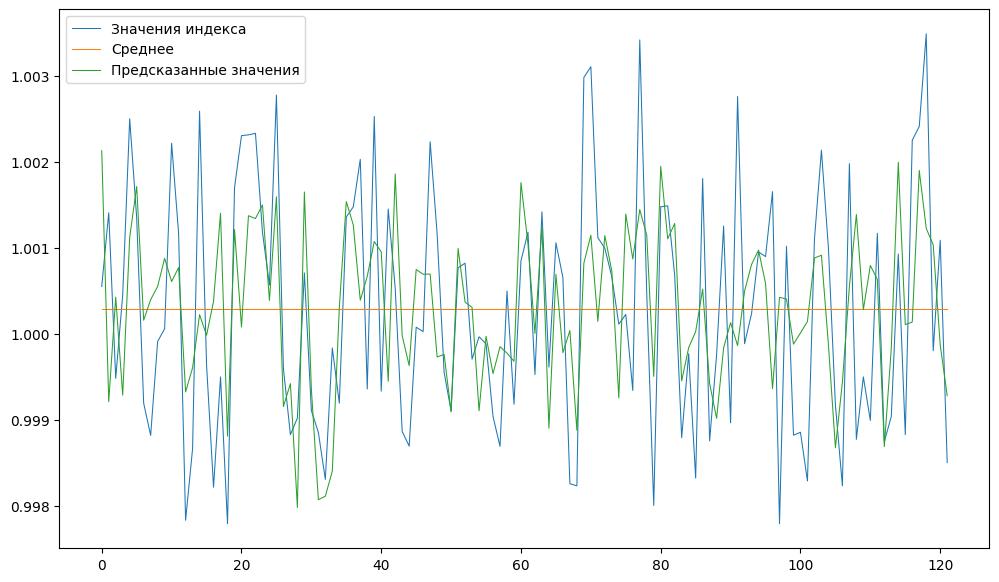

----------------------------------------


In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', 'RTSI-change-value'], axis=1)

predicted_video_id = 'upload_file/06897558-d0b4-4cbf-b57a-5faf070fed30.mp4'

to_predict = cleared_result_data.loc[result_data['video_path'] == predicted_video_id]
train_for_prediction = cleared_result_data.loc[result_data['video_path'] != predicted_video_id]

X = train_for_prediction.drop(['video_path', 'RTSI-value'], axis=1)

y = train_for_prediction[['RTSI-value']]

to_predict = to_predict.drop(['RTSI-value', 'video_path'], axis=1)

to_predict = to_predict.interpolate(method='linear', limit_direction='both')
to_predict = to_predict.iloc[:-2]

X.replace('No face', np.nan, inplace=True)
X = X.interpolate(method='linear', limit_direction='both')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# # Train the model
print('Linear regression')
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# Train the model
# print('Polynomial regression')
# poly = PolynomialFeatures(degree=5)
# X_poly = poly.fit_transform(X)
# X_test_poly = poly.fit_transform(X_test)
# model = LinearRegression()
# model.fit(X_poly, y)

# y_pred = model.predict(X_test_poly)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# # Train the model
# print('Ridge regression')
# ridge = Ridge(alpha=0.1)
# ridge.fit(X_train, y_train)

# y_pred = ridge.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))


# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# # Train the model
# print('Lasso regression')
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)

# y_pred = lasso.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# # Train the model
# print('Elastic Net regression')
# elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic_net.fit(X_train, y_train)

# y_pred = elastic_net.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# # Train the model
# print('Dec tree regression')
# tree = DecisionTreeRegressor(max_depth=4)
# tree.fit(X_train, y_train)

# y_pred = tree.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))


# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# # Train the model
# print('Random forest tree regression')
# rf = RandomForestRegressor(n_estimators=100, max_depth=3)
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)


# Train the model
# print('Gradient boost')
# params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01}
# gb_reg = GradientBoostingRegressor(**params)
# gb_reg.fit(X_train, y_train)

# y_pred = gb_reg.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

time = np.arange(0, len(y_test), 1)
mean = np.mean(y_test)

plt.figure(figsize=(12, 7))

plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

plt.legend()
plt.show()
print('-' * 40)



## Video by videos changes

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', 'RTSI-value'], axis=1)

to_predict = cleared_result_data.loc[result_data['video_path'] == 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']
train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']

X = train_for_prediction.drop(['video_path', 'RTSI-change-value'], axis=1)
y = train_for_prediction[['RTSI-change-value']]

to_predict = to_predict.drop(['RTSI-change-value', 'video_path'], axis=1)
to_predict = to_predict.interpolate(method='linear', limit_direction='both')
to_predict = to_predict.iloc[:-2]

X.replace('No face', np.nan, inplace=True)
X = X.interpolate(method='linear', limit_direction='both')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# Train the model
print('Linear regression')
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Polynomial regression')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_test_poly)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Ridge regression')
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Lasso regression')
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)


# Train the model
print('Elastic Net regression')
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

Linear regression
Mean Squared Error: 5.201652988930584e-09
Mean Absolute Error: 5.408507019504163e-05
R-squared: -0.0676862384640069
----------------------------------------
Polynomial regression
Mean Squared Error: 5.02047925588152e-09
Mean Absolute Error: 5.314867738064447e-05
R-squared: -0.030498694050859365
----------------------------------------
Ridge regression
Mean Squared Error: 5.189952870856704e-09
Mean Absolute Error: 5.429617827700861e-05
R-squared: -0.06528468359626216
----------------------------------------
Lasso regression
Mean Squared Error: 5.192298455708188e-09
Mean Absolute Error: 5.427140945264815e-05
R-squared: -0.06576613606385417
----------------------------------------
Elastic Net regression
Mean Squared Error: 5.192298455708188e-09
Mean Absolute Error: 5.427140945264815e-05
R-squared: -0.06576613606385417
----------------------------------------


In [35]:
y_train

RTSI-change-value
74            0.000116
26            0.000018
63            0.000140
136           0.000018
6             0.000064
..                 ...
61            0.000045
188           0.000020
68            0.000009
275           0.000044
106           0.000000

[1044 rows x 1 columns]

## Linear regression Model building part of video predicted by parts of videos 

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


aim_column = 'RTSI-value'
not_aim_column = 'RTSI-change-value'

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', not_aim_column], axis=1)
# splitted_result_data = result_data.groupby('video_path')

train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']


# train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']

# upload_file/06897558-d0b4-4cbf-b57a-5faf070fed30.mp4
train_for_prediction.replace('No face', np.nan, inplace=True)
train_for_prediction = train_for_prediction.interpolate(method='linear', limit_direction='both')

results = []

for name, group in train_for_prediction.groupby('video_path'):

  # print(group)
  print(name)

  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  # plt.figure(figsize=(12, 7))

  print('Linear regression')
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Linear regression')

  # print('Polynomial regression')
  # poly = PolynomialFeatures(degree=1)
  # X_poly = poly.fit_transform(X)
  # X_test_poly = poly.fit_transform(X_test)
  # model = LinearRegression()
  # model.fit(X_poly, y)
  # y_pred = model.predict(X_test_poly)
  # print('Polynomial regression')

  # print('Ridge regression')
  # ridge = Ridge(alpha=0.1)
  # ridge.fit(X_train, y_train)
  # y_pred = ridge.predict(X_test)
  # print('Ridge regression')

  # print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  # print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  # plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
  # plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
  # plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

  results.append([ y_test, y_pred ])
  
  # plt.legend()
  # plt.show()
  print('-' * 40)

upload_file/06897558-d0b4-4cbf-b57a-5faf070fed30.mp4
Linear regression
Linear regression
----------------------------------------
upload_file/61899012-04de-42cc-8af0-80bd3ce99cb4.mp4
Linear regression
Linear regression
----------------------------------------
upload_file/840207c0-702c-482e-aef2-903a5f0970fb.mp4
Linear regression
Linear regression
----------------------------------------
upload_file/d1abc5e4-a2bb-4baf-b950-17865f4b568f.mp4
Linear regression
Linear regression
----------------------------------------
upload_file/f946b729-a4b6-4358-971b-55835e585cda.mp4
Linear regression
Linear regression
----------------------------------------


<ipython-input-90-f70c425b7730>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_for_prediction.replace('No face', np.nan, inplace=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dis

## *Decision* *trees* regression

### regression

Linear regression
Mean Squared Error: 2.3974059166498516e-07
Mean Absolute Error: 0.00034428764810645314
R-squared: 0.43781040656145387


<ipython-input-37-fd6e26cdf884>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_for_prediction.replace('No face', np.nan, inplace=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


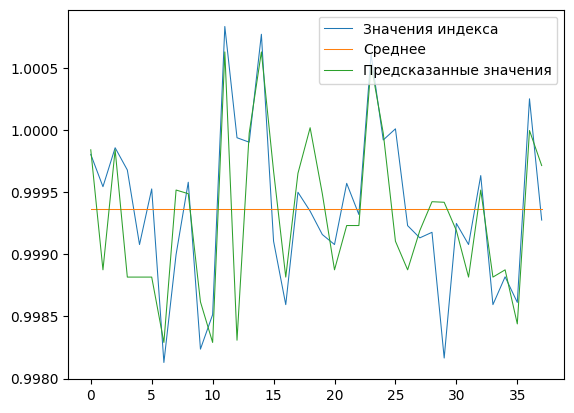

----------------------------------------
Linear regression
Mean Squared Error: 3.1833862906917753e-07
Mean Absolute Error: 0.0004161083942206335
R-squared: -1.0046099168454639


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


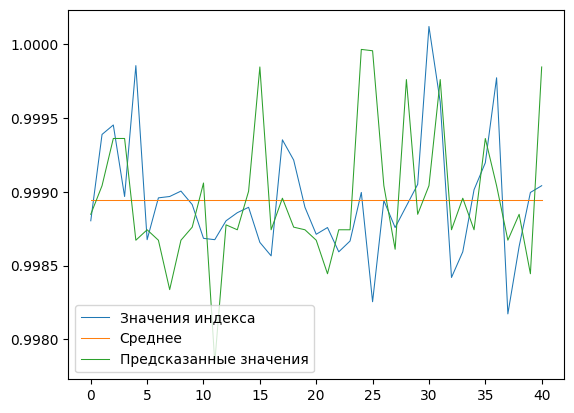

----------------------------------------
Linear regression
Mean Squared Error: 9.583976617584035e-07
Mean Absolute Error: 0.0006853195711251911
R-squared: -0.21432004801979754


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


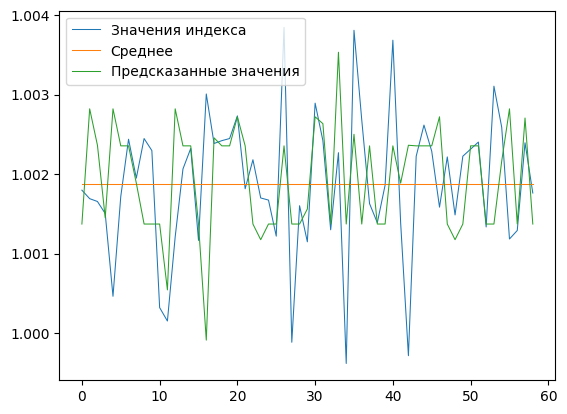

----------------------------------------
Linear regression
Mean Squared Error: 2.8018477626337735e-07
Mean Absolute Error: 0.00039446286334128046
R-squared: -1.087321110356081


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


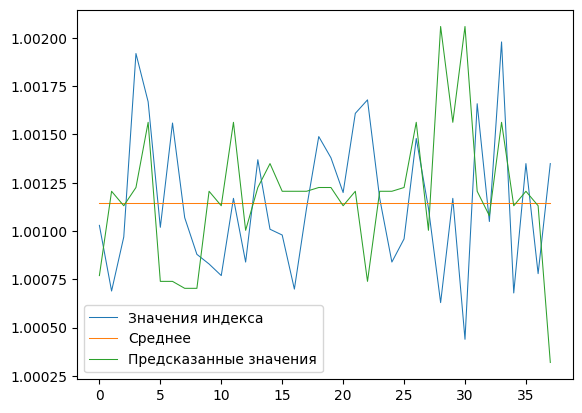

----------------------------------------
Linear regression
Mean Squared Error: 6.992447226253974e-07
Mean Absolute Error: 0.0006193410366280693
R-squared: -0.0949305081358176


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


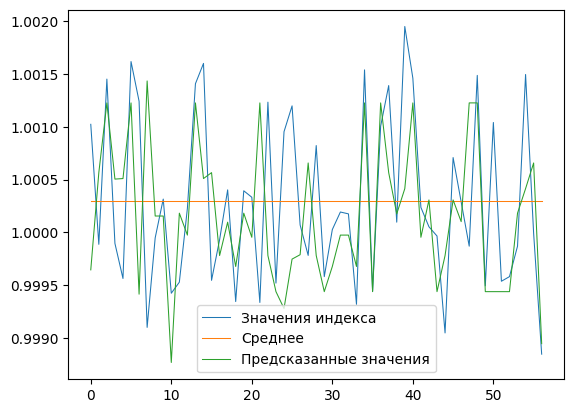

----------------------------------------


In [37]:
from sklearn.tree import DecisionTreeRegressor


aim_column = 'RTSI-value'
not_aim_column = 'RTSI-change-value'

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', not_aim_column], axis=1)
# splitted_result_data = result_data.groupby('video_path')

train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']

train_for_prediction.replace('No face', np.nan, inplace=True)
train_for_prediction = train_for_prediction.interpolate(method='linear', limit_direction='both')

for name, group in train_for_prediction.groupby('video_path'):
  # print(group)
  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  # Train the model
  print('Linear regression')

  tree = DecisionTreeRegressor(max_depth=6)
  tree.fit(X_train, y_train)

  y_pred = tree.predict(X_test)

  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
  plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
  plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')
  
  plt.legend()
  plt.show()
  print('-' * 40)

### Random forest

<ipython-input-38-277677fda7a5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 2.7325998527262115e-07
Mean Absolute Error: 0.00043046873722514024
R-squared: 0.35920772132692114


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


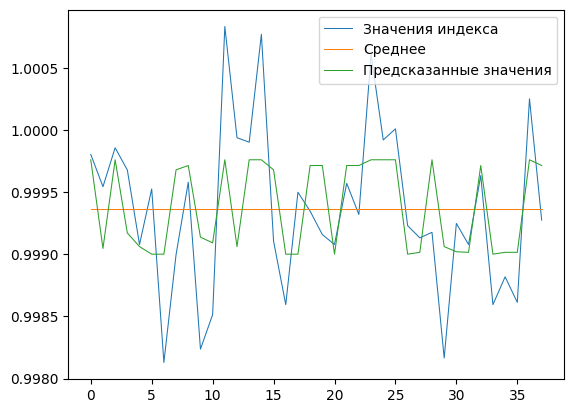

----------------------------------------


<ipython-input-38-277677fda7a5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 1.799332942017583e-07
Mean Absolute Error: 0.00031449946503516954
R-squared: -0.13305779754782754


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


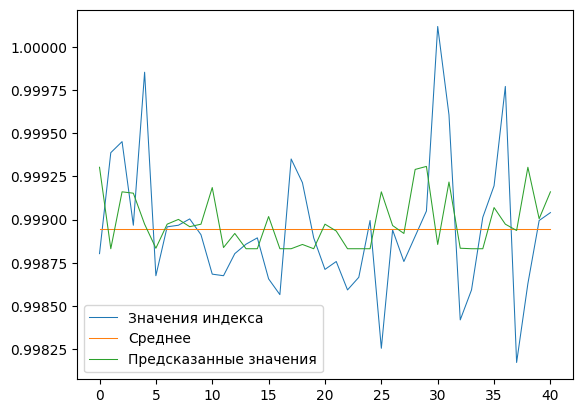

----------------------------------------


<ipython-input-38-277677fda7a5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 6.127462259986424e-07
Mean Absolute Error: 0.0005497280323878267
R-squared: 0.22363121669824249


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


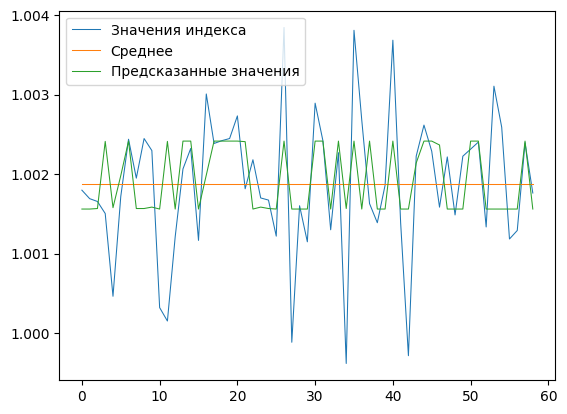

----------------------------------------


<ipython-input-38-277677fda7a5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 1.2826232832155537e-07
Mean Absolute Error: 0.00028359862701398644
R-squared: 0.044471048215194764


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


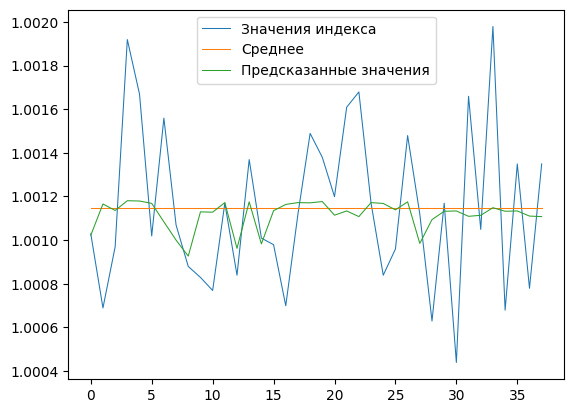

----------------------------------------


<ipython-input-38-277677fda7a5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 5.940191937765722e-07
Mean Absolute Error: 0.0006408213172905009
R-squared: 0.06983961889312473


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


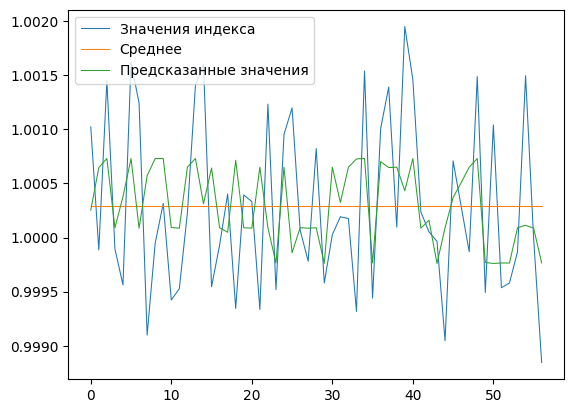

----------------------------------------


In [38]:
from sklearn.ensemble import RandomForestRegressor

for name, group in train_for_prediction.groupby('video_path'):
  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  # Train the model
  rf = RandomForestRegressor(n_estimators=len(X_train), max_depth=1)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
  plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
  plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')
  
  plt.legend()
  plt.show()
  print('-' * 40)

### Gradient boost

Mean Squared Error: 2.650853864893496e-07
Mean Absolute Error: 0.0004203581178233951
R-squared: 0.3783770840726036


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


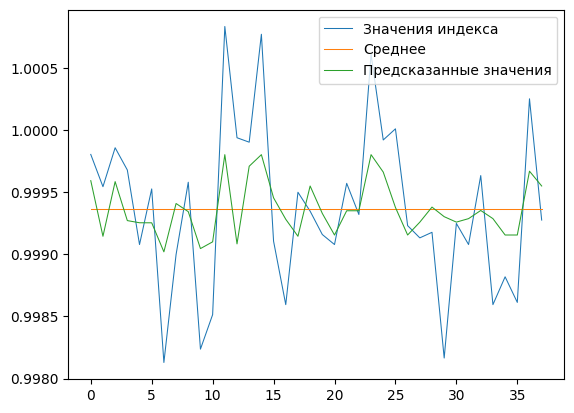

----------------------------------------
Mean Squared Error: 1.6769506807018656e-07
Mean Absolute Error: 0.00029677969979094915
R-squared: -0.05599247393416418


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


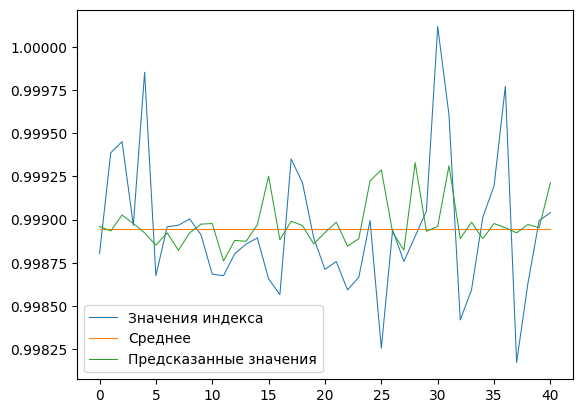

----------------------------------------
Mean Squared Error: 6.682985010487238e-07
Mean Absolute Error: 0.0005974895599769904
R-squared: 0.15324473309324715


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


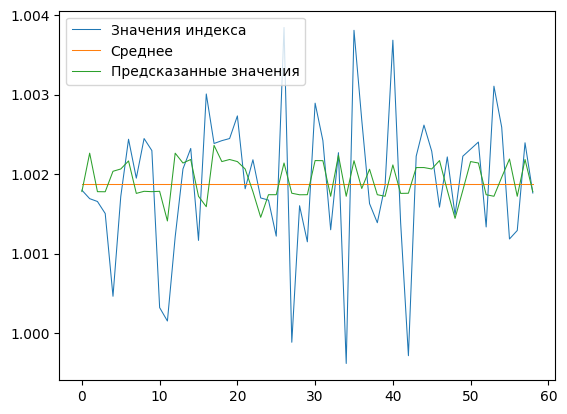

----------------------------------------
Mean Squared Error: 1.324562398411363e-07
Mean Absolute Error: 0.0002881972186373468
R-squared: 0.013227237732223118


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


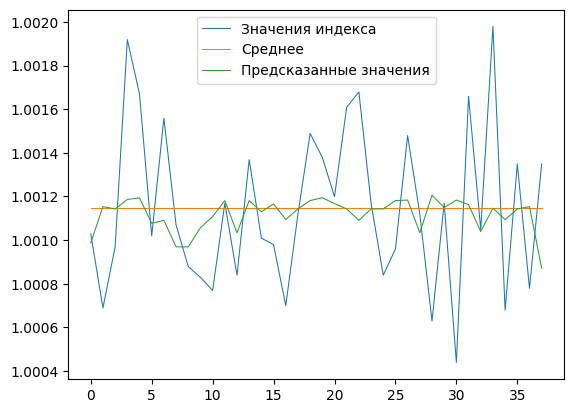

----------------------------------------
Mean Squared Error: 4.892255001150028e-07
Mean Absolute Error: 0.0005845792971293594
R-squared: 0.23393354557944945


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


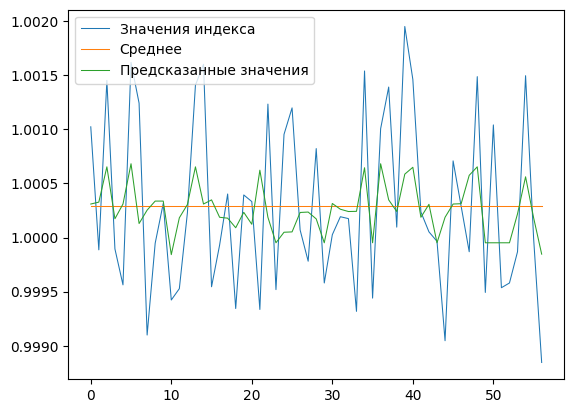

----------------------------------------


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

for name, group in train_for_prediction.groupby('video_path'):
  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  # Train the model
  params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,
            'learning_rate': 0.01}
  gb_reg = GradientBoostingRegressor(**params)
  gb_reg.fit(X_train, y_train)

  y_pred = gb_reg.predict(X_test)

  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
  plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
  plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')
  
  plt.legend()
  plt.show()
  print('-' * 40)

#### **Gradient** boosting

Mean Squared Error: 3.0560050591133917e-06
Mean Absolute Error: 0.0015252148487594514
R-squared: -6.1663051709237315


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


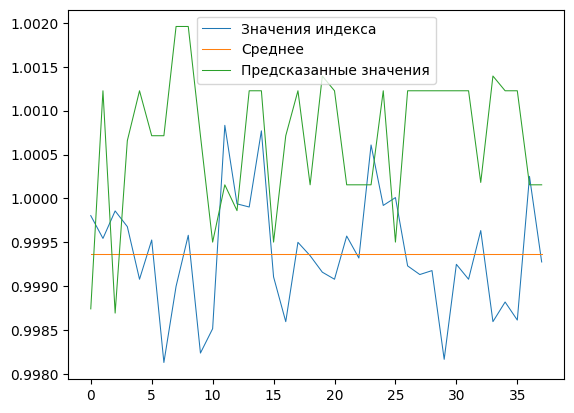

----------------------------------------
Mean Squared Error: 2.2402824075356304e-06
Mean Absolute Error: 0.0013880873274181955
R-squared: -13.107280488741592


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


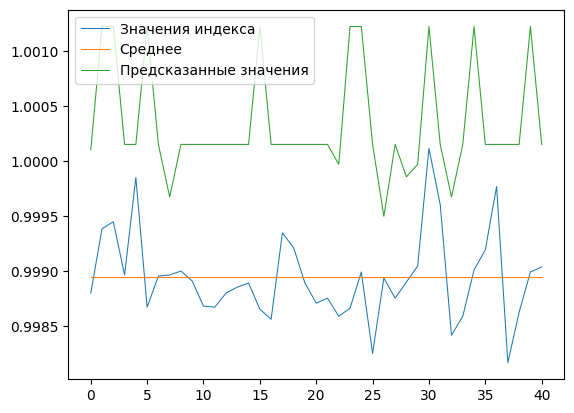

----------------------------------------
Mean Squared Error: 3.841435132351188e-06
Mean Absolute Error: 0.0016885345916575463
R-squared: -3.867219402250101


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


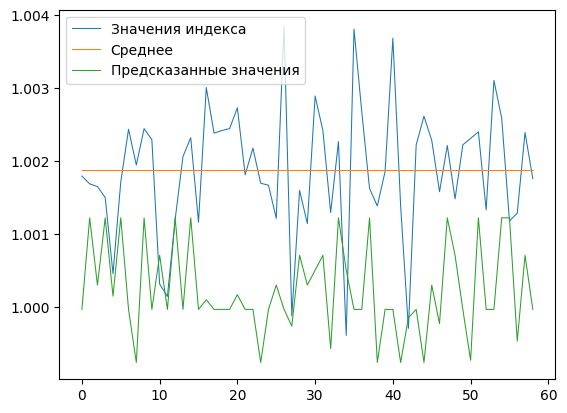

----------------------------------------
Mean Squared Error: 1.2263408063472344e-06
Mean Absolute Error: 0.0010502772975392828
R-squared: -8.135996208350257


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


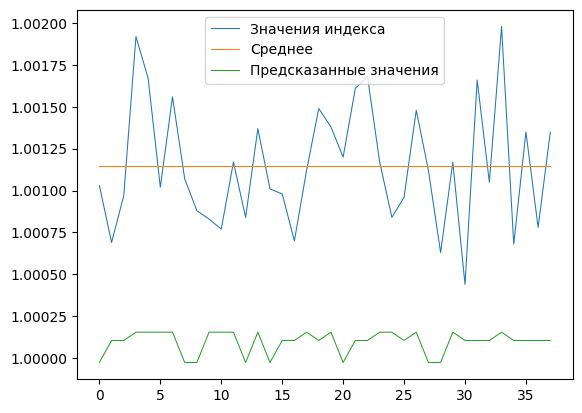

----------------------------------------
Mean Squared Error: 6.992447226253974e-07
Mean Absolute Error: 0.0006193410366280693
R-squared: -0.0949305081358176


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


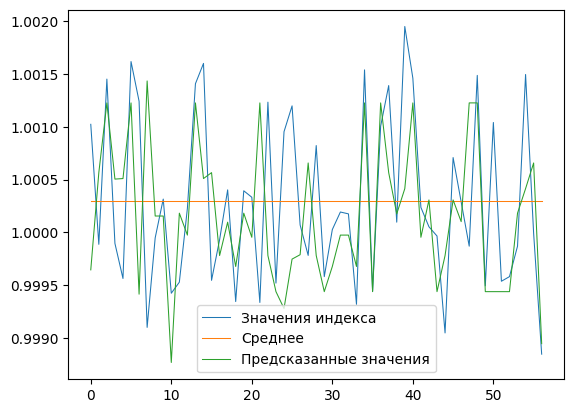

----------------------------------------


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

for name, group in train_for_prediction.groupby('video_path'):
  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  # Train the model
  gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
  gb.fit(X_train, y_train)

  y_pred = tree.predict(X_test)

  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
  plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
  plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')
  
  plt.legend()
  plt.show()
  print('-' * 40)

### Presentation

#### Video by videos

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', 'RTSI-change-value'], axis=1)

predicted_video_id = 'upload_file/06897558-d0b4-4cbf-b57a-5faf070fed30.mp4'

to_predict = cleared_result_data.loc[result_data['video_path'] == predicted_video_id]
train_for_prediction = cleared_result_data.loc[result_data['video_path'] != predicted_video_id]

X = train_for_prediction.drop(['video_path', 'RTSI-value'], axis=1)

y = train_for_prediction[['RTSI-value']]

to_predict = to_predict.drop(['RTSI-value', 'video_path'], axis=1)

to_predict = to_predict.interpolate(method='linear', limit_direction='both')
to_predict = to_predict.iloc[:-2]

X.replace('No face', np.nan, inplace=True)
X = X.interpolate(method='linear', limit_direction='both')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Train the model
print('Linear regression')
model = LinearRegression()
model.fit(X_train, y_train)

lin_y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, lin_y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lin_y_pred))
print('R-squared:', r2_score(y_test, lin_y_pred))

print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# Train the model
# print('Polynomial regression')
# poly = PolynomialFeatures(degree=5)
# X_poly = poly.fit_transform(X)
# X_test_poly = poly.fit_transform(X_test)
# model = LinearRegression()
# model.fit(X_poly, y)

# y_pred = model.predict(X_test_poly)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# # Train the model
# print('Ridge regression')
# ridge = Ridge(alpha=0.1)
# ridge.fit(X_train, y_train)

# y_pred = ridge.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))


# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# # Train the model
# print('Lasso regression')
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)

# y_pred = lasso.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# # Train the model
# print('Elastic Net regression')
# elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic_net.fit(X_train, y_train)

# y_pred = elastic_net.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# Train the model
print('Dec tree regression')
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

tree_reg_y_pred = tree.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, tree_reg_y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, tree_reg_y_pred))
print('R-squared:', r2_score(y_test, tree_reg_y_pred))


print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)

# Train the model
# print('Random forest tree regression')
# rf = RandomForestRegressor(n_estimators=100, max_depth=2)
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

# plt.legend()
# plt.show()
# print('-' * 40)


# Train the model
# print('Gradient boost')
# params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01}
# gb_reg = GradientBoostingRegressor(**params)
# gb_reg.fit(X_train, y_train)

# y_pred = gb_reg.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# print('-' * 40)

# time = np.arange(0, len(y_test), 1)
# mean = np.mean(y_test)

# plt.figure(figsize=(12, 7))

# plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
# plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее')
# plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')
# plt.plot(time, lin_y_pred, linewidth=0.75, label='Предсказанные значения')
# plt.plot(time, tree_reg_y_pred, linewidth=0.75, label='Предсказанные значения')



# plt.legend()
# plt.show()
# print('-' * 40)



Linear regression
Mean Squared Error: 1.4491668355104412e-06
Mean Absolute Error: 0.0010109169802787418
R-squared: 0.2654591004841622
----------------------------------------
Dec tree regression
Mean Squared Error: 1.1366372396638402e-06
Mean Absolute Error: 0.0008155025557778616
R-squared: 0.4238713445634461
----------------------------------------


In [42]:
y_pred

array([0.99964425, 1.0005657 , 1.00122657, 1.00050446, 1.00050957,
       1.00122657, 0.99941389, 1.00143466, 1.00015455, 1.00015455,
       0.99876654, 1.00018152, 0.99997376, 1.00122657, 1.00050957,
       1.0005657 , 0.99977971, 1.00009623, 0.99967633, 1.00018152,
       0.99995298, 1.00122657, 0.99977971, 0.9994378 , 0.9992783 ,
       0.99974631, 0.99978786, 1.00065734, 0.99977971, 0.9994378 ,
       0.99967633, 0.99997376, 0.99997376, 0.99967633, 1.00122657,
       0.9994378 , 1.00122657, 1.0005657 , 1.00017496, 1.00041407,
       1.00122657, 0.99995298, 1.00030685, 0.9994378 , 0.99977971,
       1.00030685, 1.00010148, 1.00122657, 1.00122657, 0.9994378 ,
       0.9994378 , 0.9994378 , 0.9994378 , 1.00018152, 1.00041407,
       1.00065734, 0.998945  ])

ValueError: ignored

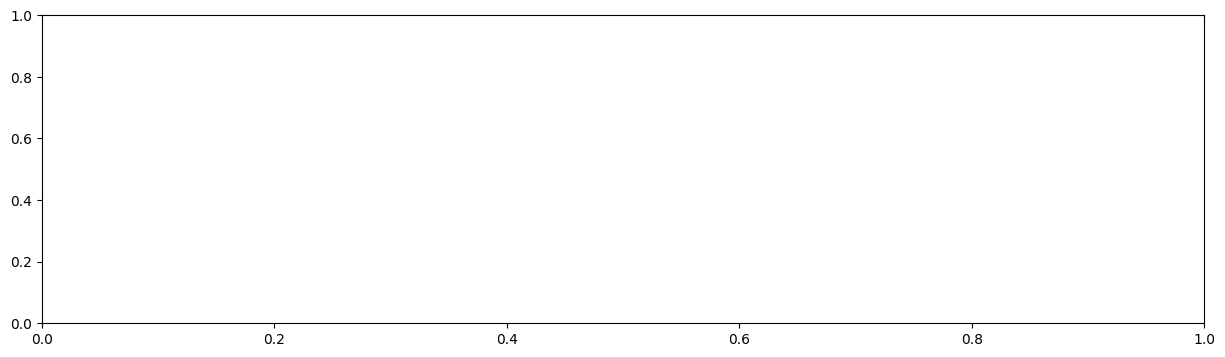

In [43]:
plt.figure(figsize=(15, 4))

plt.plot(time, y_test, linewidth=1, label='Значения индекса')
plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее значение', linestyle='dashed')
# plt.plot(time, y_pred, linewidth=0.5, label='Градиентный спуск')
# plt.plot(time, lin_y_pred, linewidth=0.5, label='Линейная регрессия')
plt.plot(time, y_pred, linewidth=0.75, label='Случайный лес')


plt.legend(loc='upper right')

plt.show()
print('-' * 40)

#### Random forest parts video

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for name, group in train_for_prediction.groupby('video_path'):
  X = group.drop(['video_path', aim_column], axis=1)
  y = group[[aim_column]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  # Train the model
  rf = RandomForestRegressor(n_estimators=len(X_train), max_depth=1)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))

  time = np.arange(0, len(y_test), 1)
  mean = np.mean(y_test)

  plt.figure(figsize=(12, 4))

  plt.plot(time, y_test, linewidth=1, label='Значения индекса')
  plt.plot(time, [mean for x in time], linewidth=0.75, label='Среднее значение', linestyle='dashed')
  # plt.plot(time, y_pred, linewidth=0.5, label='Градиентный спуск')
  # plt.plot(time, lin_y_pred, linewidth=0.5, label='Линейная регрессия')
  plt.plot(time, y_pred, linewidth=0.75, label='Случайный лес')


  plt.legend(loc='upper right')

  plt.show()
  print('-' * 40)